the meaning of some of the column headers are not obvious. Here's what they mean,

age: The person's age in years<br>
sex: The person's sex (1 = male, 0 = female)<br>
cp: The chest pain experienced (Value 1: typical angina, Value 2: atypical angina, Value 3: non-anginal pain, Value 4: asymptomatic)<br>
trestbps: The person's resting blood pressure (mm Hg on admission to the hospital)<br>
chol: The person's cholesterol measurement in mg/dl<br>
fbs: The person's fasting blood sugar (> 120 mg/dl, 1 = true; 0 = false)<br>
restecg: Resting electrocardiographic measurement (0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria)<br>
thalach: The person's maximum heart rate achieved<br>
exang: Exercise induced angina (1 = yes; 0 = no)<br>
oldpeak: ST depression induced by exercise relative to rest ('ST' relates to positions on the ECG plot. See more here)<br>
slope: the slope of the peak exercise ST segment (Value 1: upsloping, Value 2: flat, Value 3: downsloping)<br>
ca: The number of major vessels (0-4)<br>
thal: A blood disorder called thalassemia (3 = normal; 6 = fixed defect; 7 = reversable defect)<br>
target: Heart disease (0 = no, 1 = yes)<br>


In [3]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import  confusion_matrix, classification_report, roc_curve, auc, RocCurveDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
import warnings
warnings.filterwarnings("ignore")

In [4]:
df = pd.read_csv('heart.csv')

In [5]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [7]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [9]:
df.shape

(303, 14)

In [10]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [11]:
df2 = df.copy()

In [12]:
df2.columns = ['age', 'sex', 'chest_pain_type', 'resisting_blood_pressure', 'cholesterol', 'fasting_blood_sugar', 
               'rest_ecg', 'max_heart_rate_achieved', 'exercise_induced_angina', 'st_depression', 'st_slope', 
               'num_major_vessels', 'thalassemia', 'target']
df2.head(10)

,age,sex,chest_pain_type,resisting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [13]:
df2.nunique()

age                          41
sex                           2
chest_pain_type               4
resisting_blood_pressure     49
cholesterol                 152
fasting_blood_sugar           2
rest_ecg                      3
max_heart_rate_achieved      91
exercise_induced_angina       2
st_depression                40
st_slope                      3
num_major_vessels             5
thalassemia                   4
target                        2
dtype: int64

In [14]:
#change column values for better analysis
df2['sex'] = df2['sex'].replace(to_replace=[1,0], value=['male', 'female'])
df2['chest_pain_type'] = df2['chest_pain_type'].replace(to_replace =[0,1,2,3], value=['typical angina','atypical angina','non-anginal pain','asymptomatic'])
df2.fasting_blood_sugar = df2.fasting_blood_sugar.replace(to_replace=[0,1], value=['lower than 120mg/ml', 'higher than 120mg/ml'])
df2.rest_ecg = df2.rest_ecg.replace(to_replace=[0,1,2], value=['normal', 'ST-T wave abnormality', 'left ventricular hypertrophy'])
df2.exercise_induced_angina = df2.exercise_induced_angina.replace(to_replace=[0,1], value=['no', 'yes'])
df2.st_slope = df2.st_slope.replace(to_replace=[0,1,2], value=['upsloping', 'flat', 'downsloping'])
df2.thalassemia = df2.thalassemia.replace(to_replace=[1,2,3], value=['normal', 'fixed defect','reversable defect'])

In [15]:
df2.head()

,age,sex,chest_pain_type,resisting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
0,63,male,asymptomatic,145,233,higher than 120mg/ml,normal,150,no,2.3,upsloping,0,normal,1
1,37,male,non-anginal pain,130,250,lower than 120mg/ml,ST-T wave abnormality,187,no,3.5,upsloping,0,fixed defect,1
2,41,female,atypical angina,130,204,lower than 120mg/ml,normal,172,no,1.4,downsloping,0,fixed defect,1
3,56,male,atypical angina,120,236,lower than 120mg/ml,ST-T wave abnormality,178,no,0.8,downsloping,0,fixed defect,1
4,57,female,typical angina,120,354,lower than 120mg/ml,ST-T wave abnormality,163,yes,0.6,downsloping,0,fixed defect,1


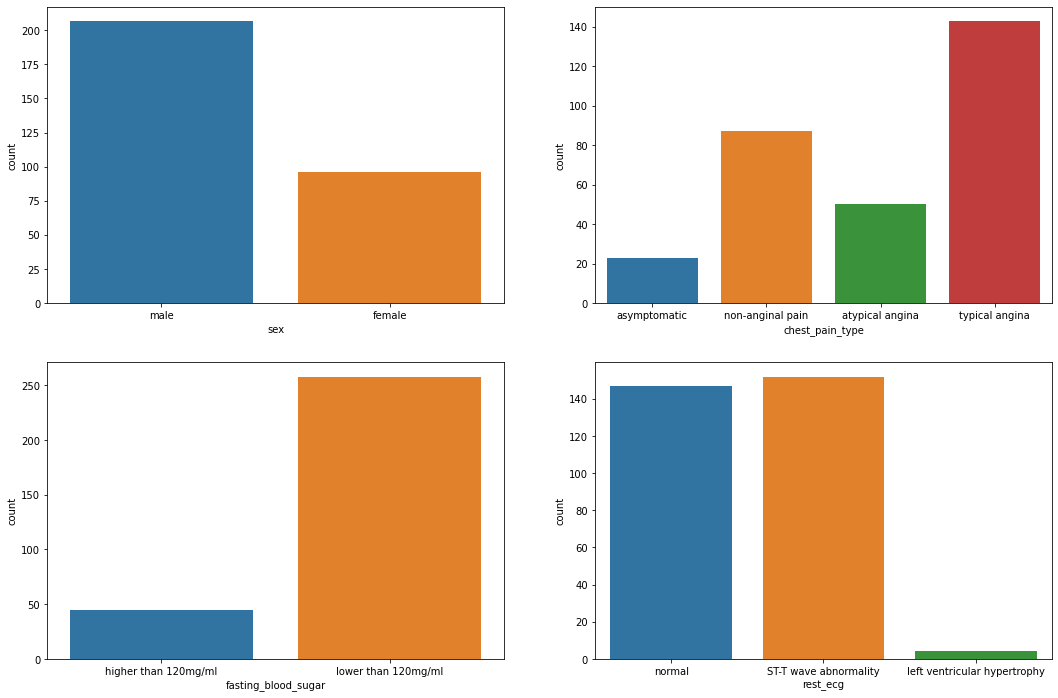

In [17]:
plt.figure(figsize=(18,12))

plt.subplot(2,2,1)
sns.countplot(x='sex', data=df2)

plt.subplot(2,2,2)
sns.countplot(x='chest_pain_type', data=df2)

plt.subplot(2,2,3)
sns.countplot(x='fasting_blood_sugar', data=df2)

plt.subplot(2,2,4)
sns.countplot(x='rest_ecg', data=df2)

plt.show()

- in sex column male has the majority in the data
- typical angina is most popular in chest pain type in the data
- most of the persons in the data has fasting blood sugar lower than 120mg/ml in the data
- normal and ST-T wave abnormality have the majority in Resting electrocardiographic measurement in the data

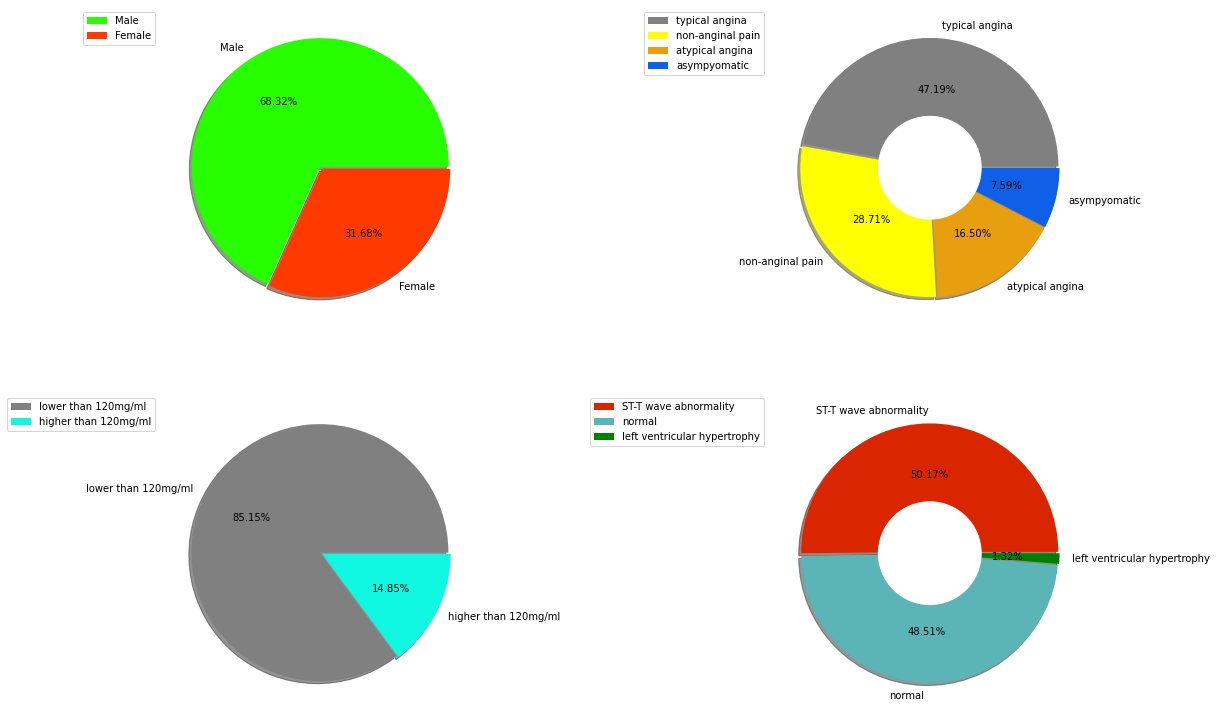

In [19]:
plt.figure(figsize=(20,13))

plt.subplot(2,2,1)
male = df2['sex'][df2['sex'] == 'male'].count()
female = df2['sex'][df2['sex'] == 'female'].count()
plt.pie([male, female], labels=['Male', 'Female'], autopct="%.2f%%", shadow=True, explode=[0.01,0.01], colors=['#27FF00', '#FF3A00'])
plt.legend(bbox_to_anchor=(0, 1))

plt.subplot(2,2,2)
ta = df2['chest_pain_type'][df2['chest_pain_type'] == 'typical angina'].count()
non_ap = df2['chest_pain_type'][df2['chest_pain_type'] == 'non-anginal pain'].count()
aa = df2['chest_pain_type'][df2['chest_pain_type'] == 'atypical angina'].count()
asym = df2['chest_pain_type'][df2['chest_pain_type'] == 'asymptomatic'].count()
weights = [ta, non_ap, aa, asym]
labels = ['typical angina', 'non-anginal pain', 'atypical angina', 'asympyomatic']
plt.pie(weights, labels=labels, autopct='%.2f%%', explode=(0.01,0.01,0.01,0.01), shadow=True, colors=['grey', 'yellow', '#E89F0F', '#0F60E7'])
my_circle = plt.Circle( (0,0), 0.4, color='white')
plt.gcf().gca().add_artist(my_circle)
plt.legend(bbox_to_anchor=(0, 1))


plt.subplot(2,2,3)
low = df2['fasting_blood_sugar'][df2['fasting_blood_sugar'] == 'lower than 120mg/ml'].count()
high = df2['fasting_blood_sugar'][df2['fasting_blood_sugar'] == 'higher than 120mg/ml'].count()
labels = ['lower than 120mg/ml', 'higher than 120mg/ml']
plt.pie([low, high], labels=labels, autopct="%.2f%%", shadow=True, explode=[0.01,0.01], colors=['grey', '#10F7E2'])
plt.legend(bbox_to_anchor=(0, 1))

plt.subplot(2,2,4)
st = df2['rest_ecg'][df2['rest_ecg'] == 'ST-T wave abnormality'].count()
normal = df2['rest_ecg'][df2['rest_ecg'] == 'normal'].count()
lvh = df2['rest_ecg'][df2['rest_ecg'] == 'left ventricular hypertrophy'].count()
weights = [st, normal, lvh]
labels = ['ST-T wave abnormality', 'normal', 'left ventricular hypertrophy']
plt.pie(weights, labels=labels, autopct='%.2f%%', explode=(0.01,0.01,0.01), shadow=True, colors=['#DA2600', '#5BB5B7', 'green'])
my_circle = plt.Circle( (0,0), 0.4, color='white')
plt.gcf().gca().add_artist(my_circle)
plt.legend(bbox_to_anchor=(0, 1))

plt.show()

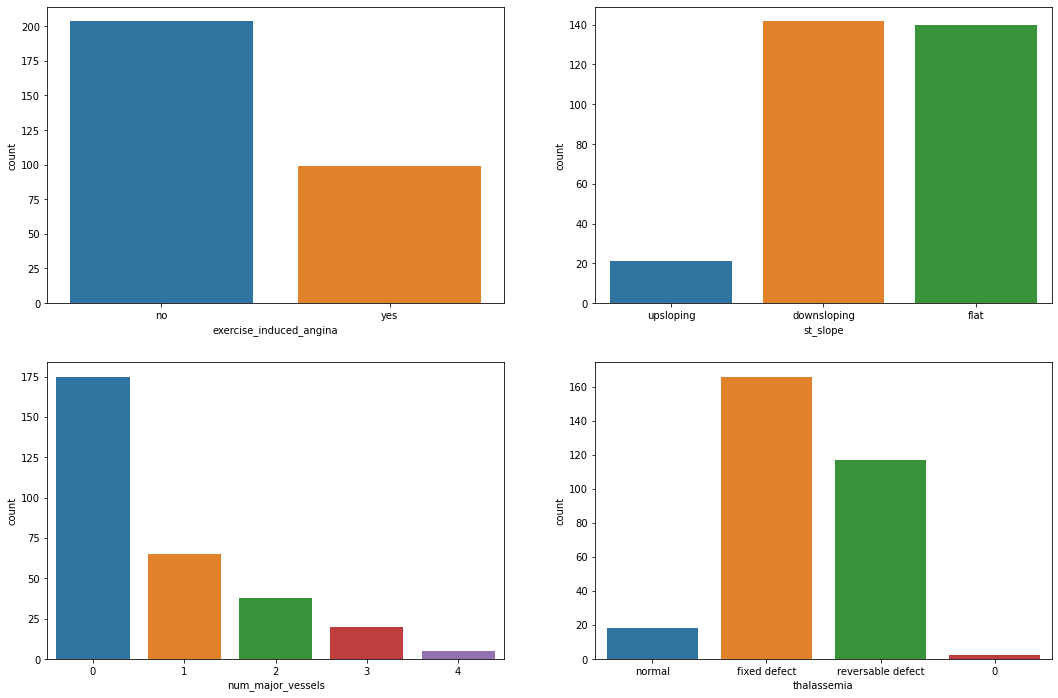

In [20]:
plt.figure(figsize=(18,12))

plt.subplot(2,2,1)
sns.countplot(x='exercise_induced_angina', data=df2)

plt.subplot(2,2,2)
sns.countplot(x='st_slope', data=df2)

plt.subplot(2,2,3)
sns.countplot(x='num_major_vessels', data=df2)

plt.subplot(2,2,4)
sns.countplot(x='thalassemia', data=df2)

plt.show()

In [21]:
df2.target = df2.target.replace(to_replace=[0,1], value=['no', 'yes'])

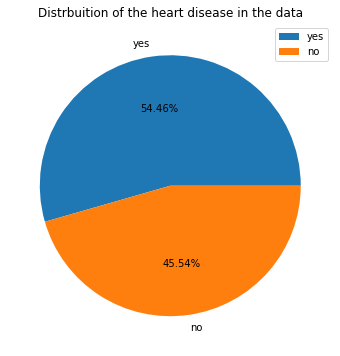

In [22]:
plt.figure(figsize=(12,6))
yes = df2.target[df2.target == 'yes'].count()
no = df2.target[df2.target == 'no'].count()
plt.title("Distrbuition of the heart disease in the data")
labels = ['yes', 'no']
plt.pie([yes, no], labels=labels, autopct="%.2f%%")
plt.legend()
plt.show()

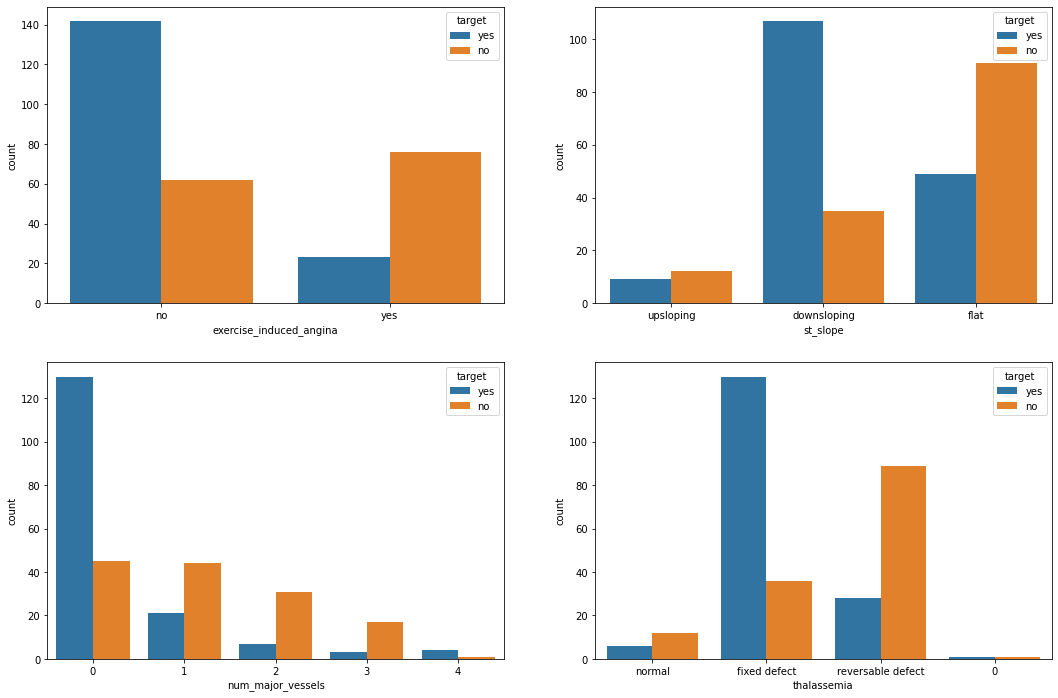

In [23]:
plt.figure(figsize=(18,12))
plt.subplot(2,2,1)
sns.countplot(x='exercise_induced_angina', hue='target', data=df2)

plt.subplot(2,2,2)
sns.countplot(x='st_slope', hue='target',data=df2)

plt.subplot(2,2,3)
sns.countplot(x='num_major_vessels', hue='target',data=df2)

plt.subplot(2,2,4)
sns.countplot(x='thalassemia', hue='target',data=df2)

plt.show()

- in the data  exercise_induced_angina when its value is No, then most people have heart disease, but exercise_induced_angina when its value is Yes, then most people do not have heart disease
- in the data when St_slop is downsloping most pepole are at risk of heart disease otherwise when St_slop is flat most pepole are less likely to get heart disease
- in the data if num_major_vessels = 0 pepole more likely to have heart disease 
- in the data if thalassemia = fixed defect pepole at risk of heart disease otherwise when thalassemia is reversable defect pepole are less likely to get heart disease

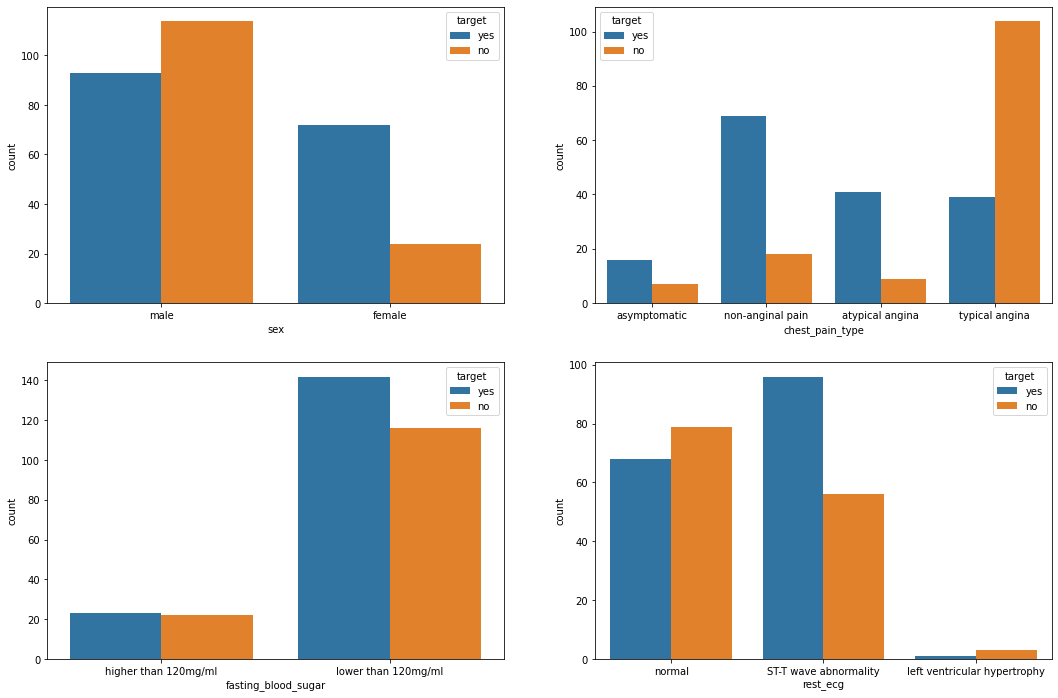

In [24]:
plt.figure(figsize=(18,12))

plt.subplot(2,2,1)
sns.countplot(x='sex', hue='target',data=df2)

plt.subplot(2,2,2)
sns.countplot(x='chest_pain_type', hue='target', data=df2)

plt.subplot(2,2,3)
sns.countplot(x='fasting_blood_sugar', hue='target',data=df2)

plt.subplot(2,2,4)
sns.countplot(x='rest_ecg', hue='target',data=df2)

plt.show()

- in the data There are men who do not have heart disease more than men who have heart disease, on the other hand there are women who have heart disease more than women who do not have heart disease <br>
- in the data People who have typical angina as the chest pain type most likely do not have heart disease, Any other chest pain type, you most likely have heart disease
- in the data You cannot clearly diagnose heart disease by fasting blood sugar
- in the data resesting electromagnetic when  = ST-T wave abnormality Pepole are more likely to have heart disease

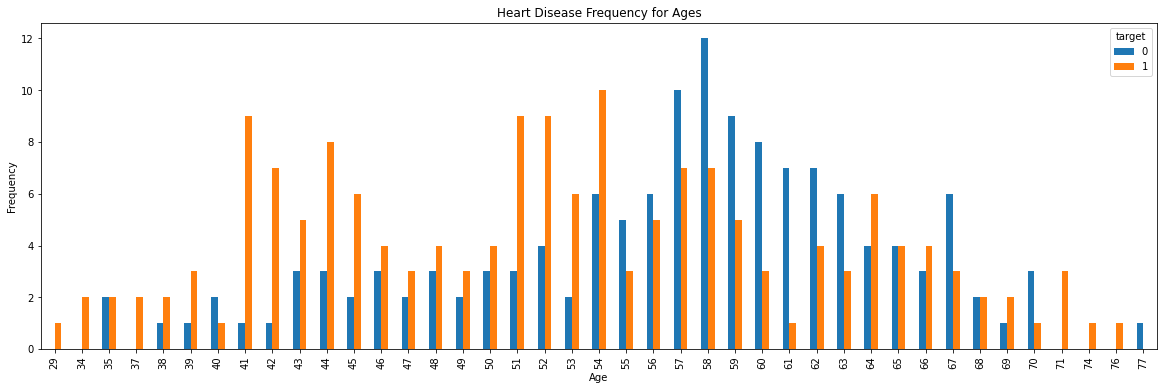

In [25]:
pd.crosstab(df.age,df.target).plot(kind="bar",figsize=(20,6))
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [26]:
FEATURES = [col for col in df.columns if col not in ['target']]
FEATURES

['age',
 'sex',
 'cp',
 'trestbps',
 'chol',
 'fbs',
 'restecg',
 'thalach',
 'exang',
 'oldpeak',
 'slope',
 'ca',
 'thal']

In [27]:
cat_features = [col for col in FEATURES if df[col].nunique() < 25]
cat_features

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

In [28]:
cont_features = [col for col in FEATURES if df[col].nunique() >= 25 and col not in ['age']]
cont_features

['trestbps', 'chol', 'thalach', 'oldpeak']

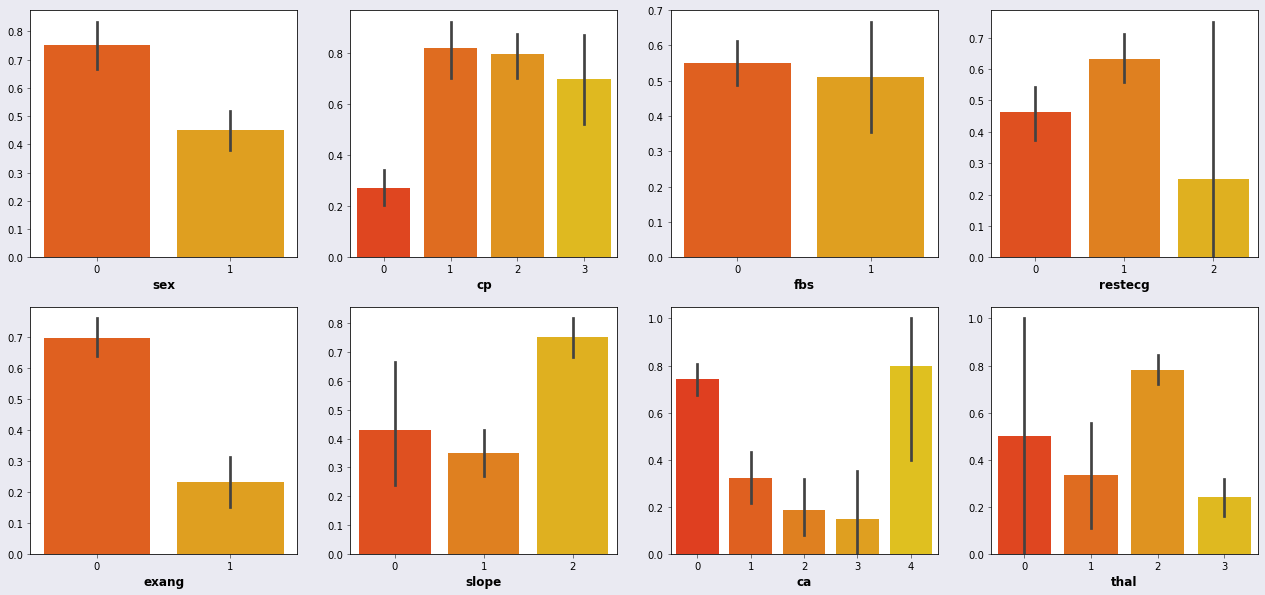

In [30]:
ncols = 4
nrows = int(len(cat_features) / ncols + (len(FEATURES) % ncols > 0))-1

fig, axes = plt.subplots(nrows, ncols, figsize=(22, 10), facecolor='#EAEAF2')

for r in range(nrows):
    for c in range(ncols):
        col = cat_features[r*ncols+c]
        sns.barplot(y=df['target'], x=df[col], ax=axes[r, c], palette='autumn', label='Train data')
        axes[r, c].set_ylabel('')
        axes[r, c].set_xlabel(col, fontsize=12, fontweight='bold')
        axes[r, c].tick_params(labelsize=10, width=0.5)
        axes[r, c].xaxis.offsetText.set_fontsize(6)
        axes[r, c].yaxis.offsetText.set_fontsize(6)
plt.show()

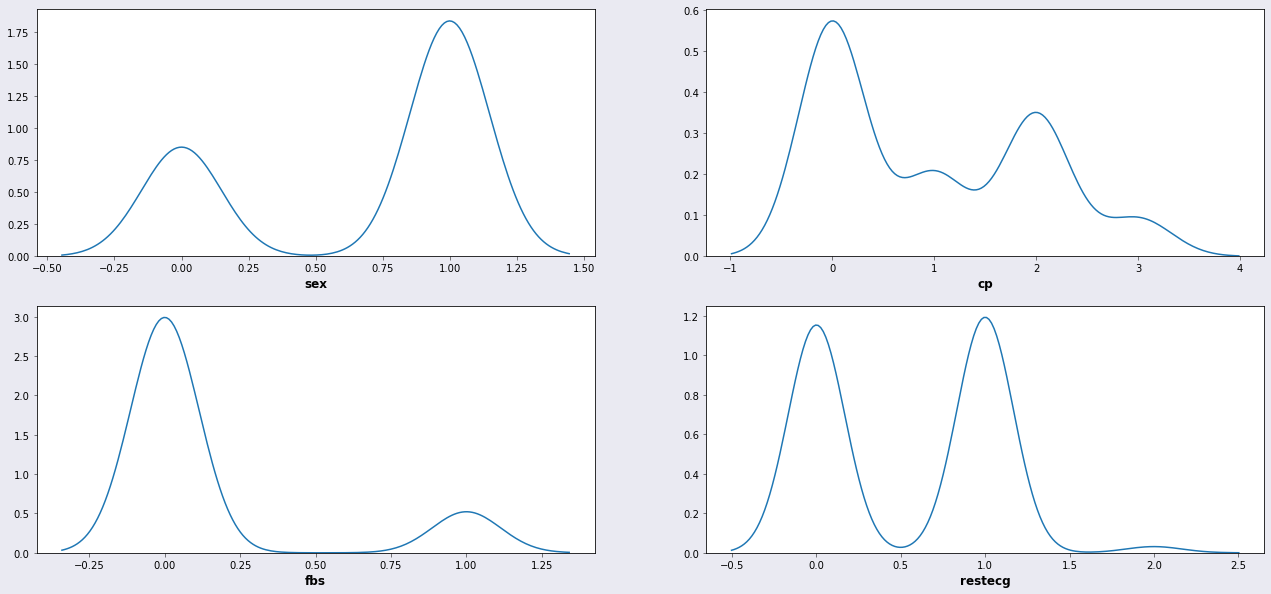

In [31]:
ncols = 2
nrows = int(len(cont_features) / ncols + (len(FEATURES) % ncols > 0))-1

fig, axes = plt.subplots(nrows, ncols, figsize=(22, 10), facecolor='#EAEAF2')

for r in range(nrows):
    for c in range(ncols):
        col = cat_features[r*ncols+c]
        sns.kdeplot(x=df[col], ax=axes[r, c])
        axes[r, c].set_ylabel('')
        axes[r, c].set_xlabel(col, fontsize=12, fontweight='bold')
        axes[r, c].tick_params(labelsize=10, width=0.5)
        axes[r, c].xaxis.offsetText.set_fontsize(6)
        axes[r, c].yaxis.offsetText.set_fontsize(6)
plt.show()

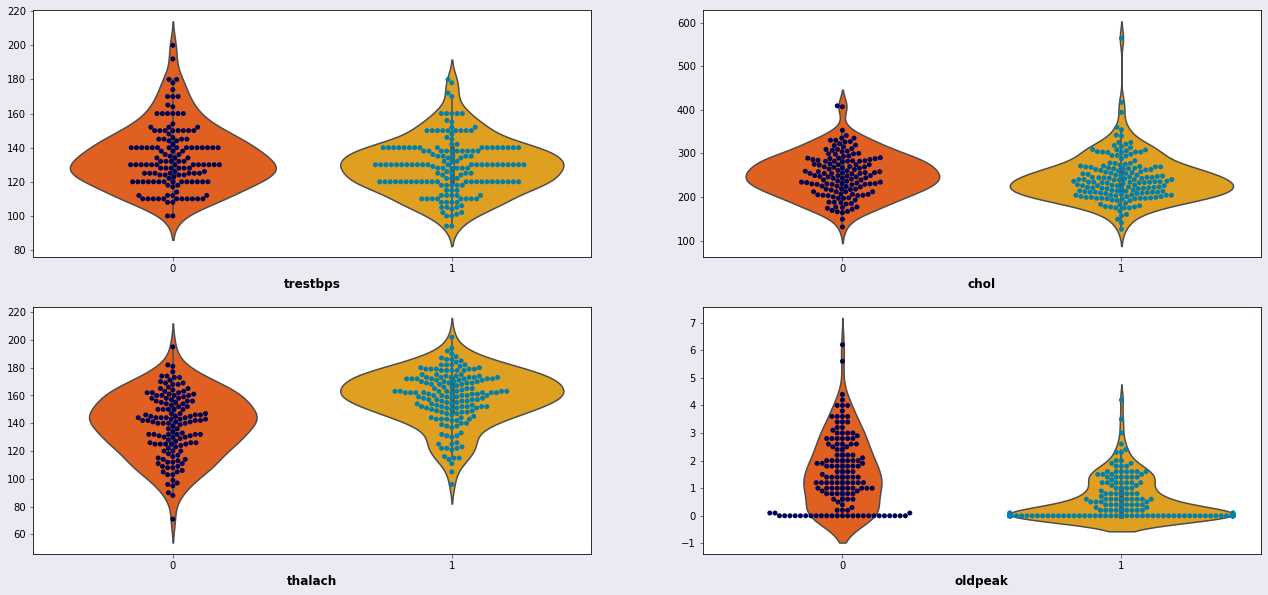

In [33]:
ncols = 2
nrows = int(len(cont_features) / ncols + (len(FEATURES) % ncols > 0))-1

fig, axes = plt.subplots(nrows, ncols, figsize=(22, 10), facecolor='#EAEAF2')

for r in range(nrows):
    for c in range(ncols):
        col = cont_features[r*ncols+c]
        sns.violinplot(y=df[col], x=df['target'],ax=axes[r, c], palette='autumn')
        sns.swarmplot(y=df[col], x=df['target'],ax=axes[r, c], palette='ocean')
        axes[r, c].set_ylabel('')
        axes[r, c].set_xlabel(col, fontsize=12, fontweight='bold')
        axes[r, c].tick_params(labelsize=10, width=0.5)
        axes[r, c].xaxis.offsetText.set_fontsize(6)
        axes[r, c].yaxis.offsetText.set_fontsize(6)
plt.show()

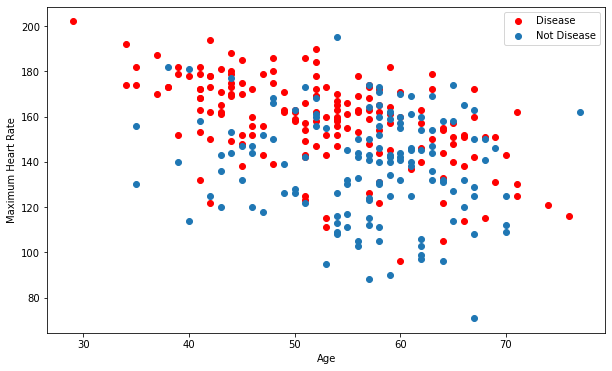

In [34]:
plt.figure(figsize=(10,6))
age_1 = df2.age[df.target==1]
age_0 = df2.age[df.target==0]
max_heart_1 = df2.max_heart_rate_achieved[(df2.target=='yes')]
max_heart_0 = df2.max_heart_rate_achieved[(df2.target=='no')]
plt.scatter(x= age_1, y= max_heart_1, c="red")
plt.scatter(x= age_0, y= max_heart_0)
plt.legend(["Disease", "Not Disease"])
plt.xlabel("Age")
plt.ylabel("Maximum Heart Rate")
plt.show()

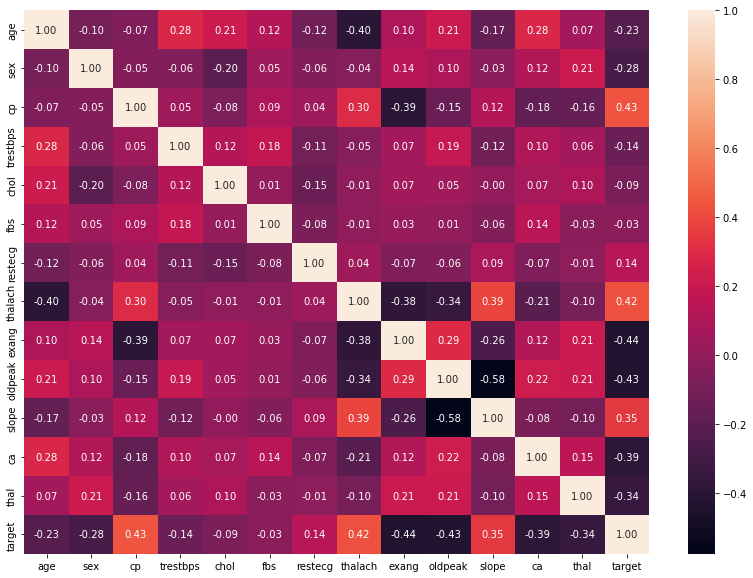

In [35]:
plt.figure(figsize=(14,10))
sns.heatmap(df.corr(), annot=True, fmt='.2f');

In [36]:
df3 = pd.get_dummies(df2, drop_first=True)

In [37]:
df3.head()

,age,resisting_blood_pressure,cholesterol,max_heart_rate_achieved,st_depression,num_major_vessels,sex_male,chest_pain_type_atypical angina,chest_pain_type_non-anginal pain,chest_pain_type_typical angina,fasting_blood_sugar_lower than 120mg/ml,rest_ecg_left ventricular hypertrophy,rest_ecg_normal,exercise_induced_angina_yes,st_slope_flat,st_slope_upsloping,thalassemia_fixed defect,thalassemia_normal,thalassemia_reversable defect,target_yes
0,63,145,233,150,2.3,0,1,0,0,0,0,0,1,0,0,1,0,1,0,1
1,37,130,250,187,3.5,0,1,0,1,0,1,0,0,0,0,1,1,0,0,1
2,41,130,204,172,1.4,0,0,1,0,0,1,0,1,0,0,0,1,0,0,1
3,56,120,236,178,0.8,0,1,1,0,0,1,0,0,0,0,0,1,0,0,1
4,57,120,354,163,0.6,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1


In [38]:
FEATURES = [col for col in df3.columns if col not in ['target_yes']]

In [39]:
scaler = StandardScaler()
for col in FEATURES:
    df3[col] = scaler.fit_transform(df3[col].to_numpy().reshape(-1,1))
df3.head()

,age,resisting_blood_pressure,cholesterol,max_heart_rate_achieved,st_depression,num_major_vessels,sex_male,chest_pain_type_atypical angina,chest_pain_type_non-anginal pain,chest_pain_type_typical angina,fasting_blood_sugar_lower than 120mg/ml,rest_ecg_left ventricular hypertrophy,rest_ecg_normal,exercise_induced_angina_yes,st_slope_flat,st_slope_upsloping,thalassemia_fixed defect,thalassemia_normal,thalassemia_reversable defect,target_yes
0,0.952197,0.763956,-0.256334,0.015443,1.087338,-0.714429,0.681005,-0.444554,-0.634648,-0.945384,-2.394438,-0.115663,1.030158,-0.696631,-0.926766,3.664502,-1.100763,3.979112,-0.793116,1
1,-1.915313,-0.092738,0.072199,1.633471,2.122573,-0.714429,0.681005,-0.444554,1.575677,-0.945384,0.417635,-0.115663,-0.970725,-0.696631,-0.926766,3.664502,0.908461,-0.251312,-0.793116,1
2,-1.474158,-0.092738,-0.816773,0.977514,0.310912,-0.714429,-1.468418,2.249444,-0.634648,-0.945384,0.417635,-0.115663,1.030158,-0.696631,-0.926766,-0.272888,0.908461,-0.251312,-0.793116,1
3,0.180175,-0.663867,-0.198357,1.239897,-0.206705,-0.714429,0.681005,2.249444,-0.634648,-0.945384,0.417635,-0.115663,-0.970725,-0.696631,-0.926766,-0.272888,0.908461,-0.251312,-0.793116,1
4,0.290464,-0.663867,2.082050,0.583939,-0.379244,-0.714429,-1.468418,-0.444554,-0.634648,1.057772,0.417635,-0.115663,-0.970725,1.435481,-0.926766,-0.272888,0.908461,-0.251312,-0.793116,1


In [40]:
X = df3.drop('target_yes', axis=1)
y = df3.target_yes

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=60)

In [42]:
def kfolds(model, model_name):
    model = cross_val_score(model, X,y, cv=10)
    model_score = np.average(model)
    print(f"{model_name} score on cross validation: {model_score * 100}%")

def train(model, model_name):
    model.fit(X_train, y_train)
    model_train_score = model.score(X_train, y_train)
    model_test_score = model.score(X_test, y_test)
    print(f"{model_name} model score on Training data: {model_train_score * 100}%\n{model_name} model score on Testing data: {model_test_score * 100}%")

def conf_matrix(model):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8,5))
    sns.heatmap(cm, annot=True);
    
def class_report(model):
    y_pred = model.predict(X_test)
    print(classification_report(y_test, y_pred))
    
def roc(model, model_name):
    y_pred_svm = model.decision_function(X_test)
    svm_fpr, svm_tpr, _ = roc_curve(y_test, y_pred_svm)
    auc_svm = auc(svm_fpr, svm_tpr)
    plt.figure(figsize=(5, 5), dpi=100)
    plt.plot(svm_fpr, svm_tpr, color="darkorange", label=f'{model_name} (auc = %0.3f)' % auc_svm)
    plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
    plt.xlabel('False Positive Rate -->')
    plt.ylabel('True Positive Rate -->')
    plt.legend()
    plt.show()

<a id='8.1'></a>
## Logistic Regression

In [44]:
lr = LogisticRegression()
kfolds(lr, 'Logistic Regression')
train(lr, 'Logistic Regression')

Logistic Regression score on cross validation: 82.82795698924733%
Logistic Regression model score on Training data: 85.46255506607929%
Logistic Regression model score on Testing data: 84.21052631578947%


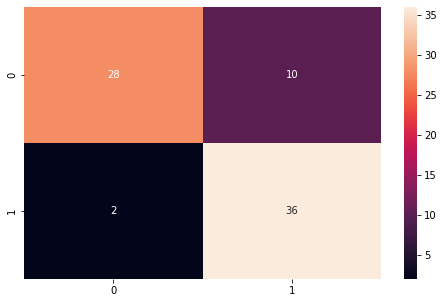

In [45]:
conf_matrix(lr)

In [46]:
class_report(lr)

              precision    recall  f1-score   support

           0       0.93      0.74      0.82        38
           1       0.78      0.95      0.86        38

    accuracy                           0.84        76
   macro avg       0.86      0.84      0.84        76
weighted avg       0.86      0.84      0.84        76



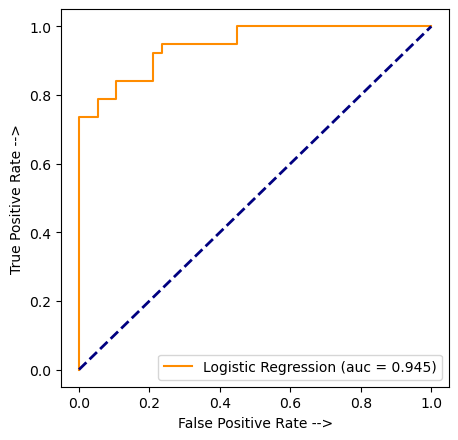

In [47]:
roc(lr, "Logistic Regression")

<a id='8.2'></a>
## Random Forest

In [48]:
rf = RandomForestClassifier(n_estimators=100, random_state=110)
kfolds(rf, "Random Forest")
train(rf, "Random Forest")

Random Forest score on cross validation: 82.80645161290323%
Random Forest model score on Training data: 100.0%
Random Forest model score on Testing data: 88.1578947368421%


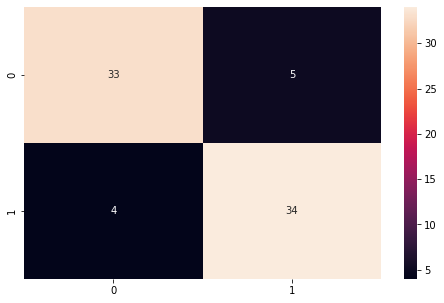

In [50]:
conf_matrix(rf)

In [51]:
class_report(rf)

              precision    recall  f1-score   support

           0       0.89      0.87      0.88        38
           1       0.87      0.89      0.88        38

    accuracy                           0.88        76
   macro avg       0.88      0.88      0.88        76
weighted avg       0.88      0.88      0.88        76



<a id='8.3'></a>
## KNN

In [53]:
knn = KNeighborsClassifier(n_neighbors=3)
kfolds(knn, "KNN")
train(knn, "KNN")

KNN score on cross validation: 80.18279569892472%
KNN model score on Training data: 86.34361233480176%
KNN model score on Testing data: 88.1578947368421%


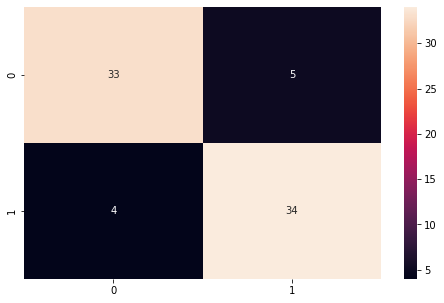

In [55]:
conf_matrix(knn)

In [56]:
class_report(knn)

              precision    recall  f1-score   support

           0       0.89      0.87      0.88        38
           1       0.87      0.89      0.88        38

    accuracy                           0.88        76
   macro avg       0.88      0.88      0.88        76
weighted avg       0.88      0.88      0.88        76



<a id='8.4'></a>
## Bagging

In [57]:
bagg = BaggingClassifier(n_estimators=100, random_state=70)
kfolds(bagg, 'Bagging')
train(bagg, "Bagging")

Bagging score on cross validation: 79.79569892473117%
Bagging model score on Training data: 100.0%
Bagging model score on Testing data: 85.52631578947368%


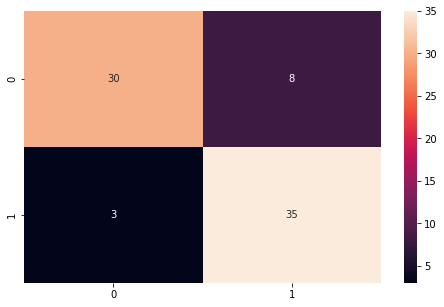

In [60]:
conf_matrix(bagg)

In [61]:
class_report(bagg)

              precision    recall  f1-score   support

           0       0.91      0.79      0.85        38
           1       0.81      0.92      0.86        38

    accuracy                           0.86        76
   macro avg       0.86      0.86      0.85        76
weighted avg       0.86      0.86      0.85        76



<a id='8.5'></a>
## Gradient Boosting

In [62]:
gb = GradientBoostingClassifier()
kfolds(gb, "Gradient Boosting")
train(gb, "Gradient Boosting")

Gradient Boosting score on cross validation: 81.13978494623657%
Gradient Boosting model score on Training data: 100.0%
Gradient Boosting model score on Testing data: 80.26315789473685%


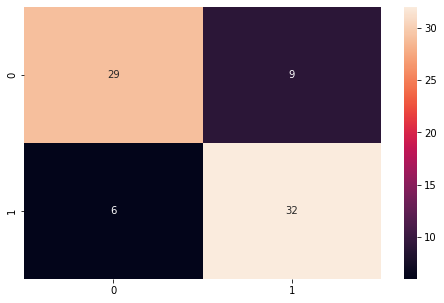

In [65]:
conf_matrix(gb)

In [66]:
class_report(gb)

              precision    recall  f1-score   support

           0       0.83      0.76      0.79        38
           1       0.78      0.84      0.81        38

    accuracy                           0.80        76
   macro avg       0.80      0.80      0.80        76
weighted avg       0.80      0.80      0.80        76



<a id='8.6'></a>
## Decision Tree

In [67]:
dt = DecisionTreeClassifier(criterion='entropy')
kfolds(dt, 'Decision Tree')
train(dt, "Decision Tree")

Decision Tree score on cross validation: 73.25806451612904%
Decision Tree model score on Training data: 100.0%
Decision Tree model score on Testing data: 71.05263157894737%


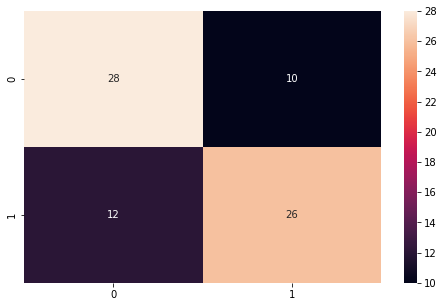

In [68]:
conf_matrix(dt)

In [69]:
class_report(dt)

              precision    recall  f1-score   support

           0       0.70      0.74      0.72        38
           1       0.72      0.68      0.70        38

    accuracy                           0.71        76
   macro avg       0.71      0.71      0.71        76
weighted avg       0.71      0.71      0.71        76



<a id='8.7'></a>
## SVM

In [70]:
svm = SVC(kernel='poly', gamma='auto', C=2)
kfolds(svm, "SVM")
train(svm, "SVM")

SVM score on cross validation: 81.87096774193549%
SVM model score on Training data: 92.07048458149781%
SVM model score on Testing data: 88.1578947368421%


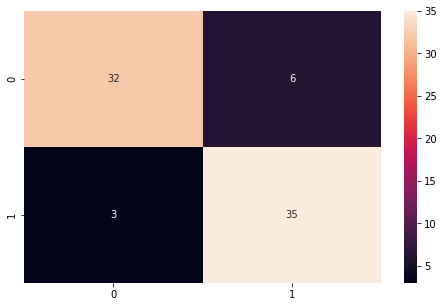

In [71]:
conf_matrix(svm)

In [72]:
class_report(svm)

              precision    recall  f1-score   support

           0       0.91      0.84      0.88        38
           1       0.85      0.92      0.89        38

    accuracy                           0.88        76
   macro avg       0.88      0.88      0.88        76
weighted avg       0.88      0.88      0.88        76



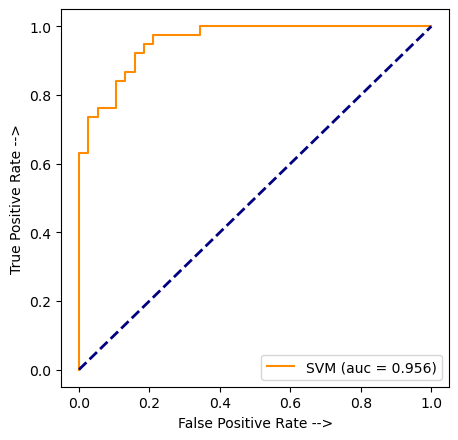

In [73]:
roc(svm, "SVM")